In [538]:
import numpy as np
import matplotlib.pyplot as plt

In [539]:
T = 10
n = 10
alpha = 0.9
beta = 0.2
gamma = 0.1
Lambda = [1,5]
cpd_z = [1-alpha,alpha,0.5]
Gamma = np.array(
    [
        [1-gamma,0,gamma],
        [0,1-gamma,gamma],
        [beta/2,beta/2,1-beta]
    ]
)



In [540]:
# Since numpy doesn't have built in support for categorical distribution
def categorical(distribution: np.array):
    # returns the result of a single sample drawn from a binomial distribution <distribution> 
    sample = np.random.multinomial(1,distribution)
    res = np.where(sample)[0][0]
    return res

In [541]:
# Simulate

C = np.zeros(T,dtype='int32')
Z = np.zeros((T,n),dtype='int32')
X = np.zeros((T,n),dtype='int32')
C[0] = 2
for t in range(T):
    if t == 0:
        pass
    else:
        C[t] = categorical(Gamma[C[t-1]])
    Z[t] = np.random.binomial(1,cpd_z[C[t]],size=n)
    for i in range(n):
        X[t][i] = np.random.poisson(Lambda[Z[t][i]])

    


Text(0.5, 0, 't')

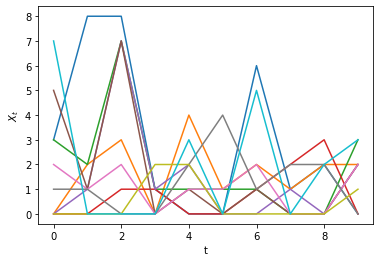

In [542]:
for i in range(n):
    plt.plot(X[0:,i])
plt.ylabel(r'$X_{t}$')
plt.xlabel('t')


In [543]:
#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression(random_state=0).fit(X,C)


In [544]:
C

array([2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [545]:
coin = lambda p, size=None: np.random.binomial(1, p, size=size)
poisson = lambda p, x : np.exp(-p)*(p**x)/np.math.factorial(x)

px = np.array([[poisson(p_,x_) for p_ in (1,5)] for x_ in range(20)])
px

T = 10
n = 10
alpha = 0.9
beta = 0.2
gamma = 0.1
Lambda = [1,5]
cpd_z = np.array([
    [1-alpha,   alpha],
    [alpha,     1-alpha],
    [0.5, 0.5]
    ])

Gamma = np.array(
    [
        [1-gamma,0,gamma],
        [0,1-gamma,gamma],
        [beta/2,beta/2,1-beta]
    ]
)

In [546]:
%%latex
Factorizing a single time-slice of the network yields
$$P(C)^n\sum_Z P(Z|C) \prod_{x_i} P(x_i | Z)$$

<IPython.core.display.Latex object>

In [547]:
c = np.zeros(T)

sigma = np.array([0,0,1])
sigmas = np.zeros((T,3))

for t in range(1,T):
    # matrix multiplication counts as elementwise multiplication and marginalization
    tau = Gamma @ sigma
    # calculate phi's
    phi = 1
    for i in range(n):
        phi *= cpd_z @ px[X[t][i]]
    
    sigma = tau * phi
    c[t] = sigma.sum()
    sigma /= c[t]
    sigmas[t] = sigma



In [548]:
C[T-1]

0

In [550]:
sigmas

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.92001940e-06, 6.43185269e-01, 3.56808810e-01],
       [3.84207328e-03, 2.29591183e-02, 9.73198808e-01],
       [2.59622302e-08, 9.63370102e-01, 3.66298724e-02],
       [8.58900516e-07, 9.80196622e-01, 1.98025192e-02],
       [4.26405209e-10, 9.97261045e-01, 2.73895414e-03],
       [1.55233488e-07, 9.43664077e-01, 5.63357682e-02],
       [5.60368713e-10, 9.98799085e-01, 1.20091432e-03],
       [7.87296153e-10, 9.96703282e-01, 3.29671730e-03],
       [4.95448857e-08, 9.90859577e-01, 9.14037303e-03]])